Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy:
 1.0
1.0


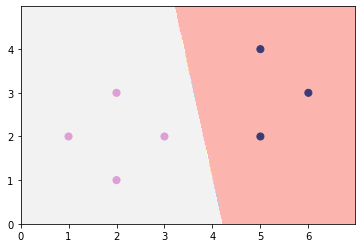

In [4]:
from mlutils import plot_2d_clf_problem
RC = RidgeClassifier(alpha=0)
RC.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=RC.predict)
print("Accuracy:\n", accuracy_score(seven_y, RC.predict(seven_X)))
print(RC.score(seven_X, seven_y))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

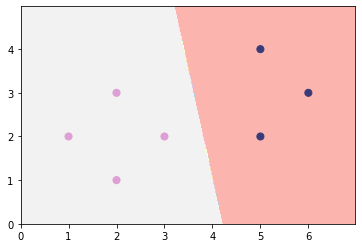

In [5]:
LR = LinearRegression()
LR.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : LR.predict(x) >= 0.5)
# kad bi koristili oznake -1 i 1, granica bi bila definirana: model.predict(x) >= 0.0

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

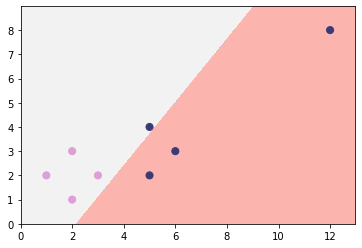

In [7]:
LR.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : LR.predict(x) >= 0.5)
# funkcija pogreske jako kaznjava ispravno klasificiran primjer u kutu

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

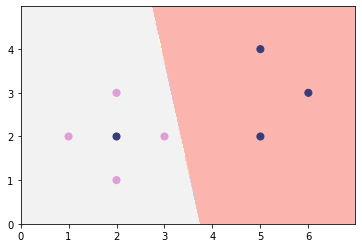

In [9]:
LR.fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : LR.predict(x) >= 0.5)
# linearan model je prejednostavan za ovakvu klasifikaciju, potrebno je obaviti preslikavanje u prostor vise 
# dimenzije gdje ce primjeri biti linearno odvojivi

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

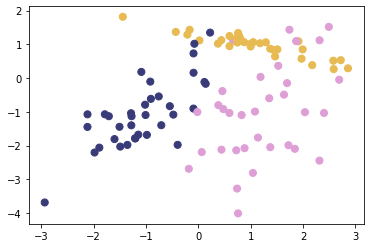

In [11]:
dataset = make_classification(n_classes=3, n_clusters_per_class=1,n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0) 
#print(dataset)
plot_2d_clf_problem(dataset[0], dataset[1])

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

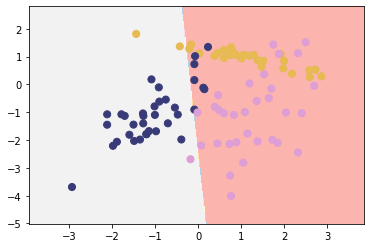

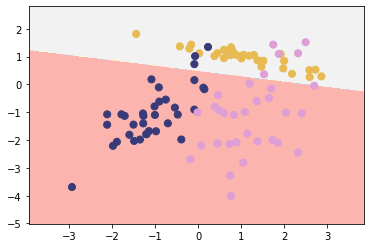

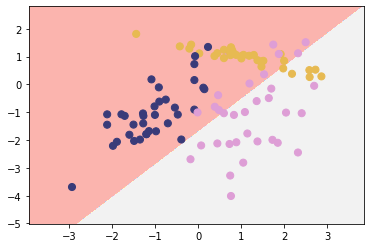

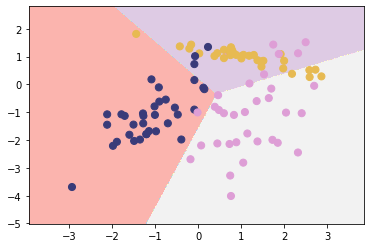

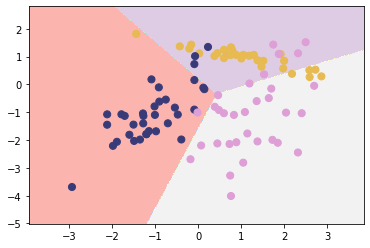

In [12]:

#print(dataset[0][0],dataset[1][0]) 
X = dataset[0]
modeli = [LinearRegression(),LinearRegression(),LinearRegression()]
for i in range(3): 
    y = np.array(dataset[1])
    for j in range(len(y)):
        if y[j] == i:
            y[j] = 1
        else:
            y[j] = 0
    modeli[i].fit(X, y)
    plot_2d_clf_problem(X, dataset[1], h=lambda x : modeli[i].predict(x) >= 0.5)
    plt.show()
# OVR ima manje modela koje treba trenirati, ali potencira neuravnotezenost klasa

def my_predict(x):
    h1 = modeli[0].predict(x.reshape(1, -1))
    h2 = modeli[1].predict(x.reshape(1, -1))
    h3 = modeli[2].predict(x.reshape(1, -1))
    return np.argmax([h1, h2, h3])


plot_2d_clf_problem(X, dataset[1], h=lambda x : my_predict(x))
plt.show()
RC = RidgeClassifier()
RC.fit(X, dataset[1])
mlutils.plot_2d_clf_problem(X, dataset[1], h=lambda x : RC.predict(x))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

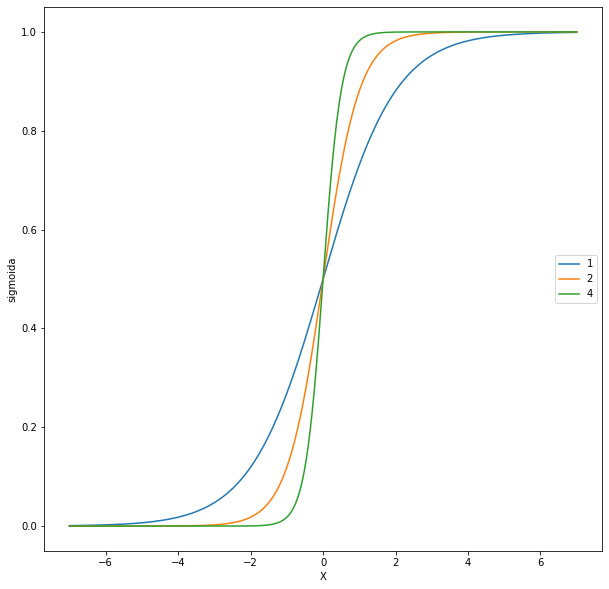

In [13]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])
X = make_instances(-7, 7, 1000)
values = [1,2,4]
plt.figure(figsize=(10,10))

sigm = lambda X, a : 1 / (1 + np.exp(-a*X)) 

for a in values:
    plt.plot(X, sigm(X, a), label=str(a))
    
plt.xlabel("X")
plt.ylabel("sigmoida")
plt.legend(loc="center right")  
# sigmoida je derivabilna na cijeloj domeni i ima kodomenu <-1,1>
# sto je faktor alpha veci, sigmoida je strmija
# sto je norma vektora tezina veca imamo strmiju sigmoidu 

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w): 
    phi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    return sigm(matmul(phi, w), 1)

# y e {0, 1}
def cross_entropy_error(X, y, w, a=0): 
    suma = 0.0
    for i in range(X.shape[0]):
        suma -= ( y[i]*np.log(lr_h(X[i], w)) + (1-y[i])*np.log(1-lr_h(X[i], w)) )
    suma += (a/2)*matmul(np.transpose(w), w) # regularizacija
    return suma / X.shape[0]

def error01(X, y, w):
    y_pred = []
    for i in range(X.shape[0]):
        if lr_h(X[i], w) >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    error = 0
    for i in range(y.shape[0]):
        if y[i] != y_pred[i]:
            error += 1
    return error / y.shape[0]

def lr_train(X, y, eta=0.1, max_iter=5000, trace=False, alpha=0, epsilon=1e-3):
    w = np.zeros(1 + X.shape[1]) # cijeli w (w tilda)
    tracer, errors, errors01 = [], [], [] 
    
    for i in range(max_iter):
        # racunanje pomaka
        dw0, dw = 0.0, np.zeros(X.shape[1])
        for j in range(X.shape[0]): 
            y_pred = lr_h(X[j], w)
            dw0 -= (y_pred - y[j])
            dw = dw - (y_pred - y[j]) * X[j] 
        
        # azuriranje tezina
        w[0] += eta * dw0 # tezinu w0 ne regulariziramo 
        w[1:] = w[1:]*(1 - eta*alpha) + eta * dw
        tracer.append(np.array(w))
            
        # uvjet izlaska
        error = cross_entropy_error(X, y, w, a=alpha)
        errors.append(error)
        if error < epsilon: 
            print("Error is below ", epsilon, ", breaking on iter:", str(i))
            break
        
        # za grafove kasnije
        errors01.append(error01(X, y, w))
        
        if i%500 == 0:
            print(i, ":", error)
    print("Reached max iteration: ", max_iter)
    if trace is True:
        return w, tracer, errors, errors01
    else:
        return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

0 : [0.73822919]
500 : [0.03647812]
1000 : [0.02013006]
1500 : [0.01402341]
2000 : [0.0107921]
Reached max iteration:  2001


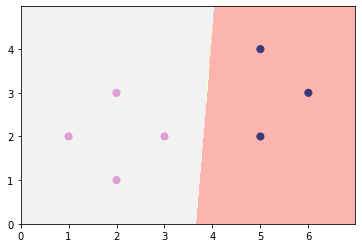

In [15]:
w = lr_train(seven_X, seven_y, max_iter=2001, trace=False)
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : lr_h(x, w) >= 0.5)
# aktivan je kriterij max iteracija
# pogreska unakrsne entropije ne moze biti 0 jer izlaz sigmoide nikada
# nije tocno 0 ili 1, a samo takvi izlazi mogu proci nekaznjeno


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

0 : [0.65344185]
500 : [0.064813]
Reached max iteration:  501


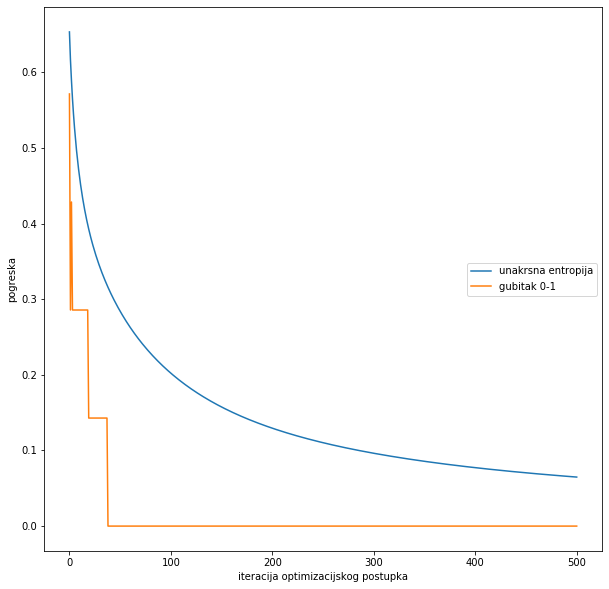

0 : [0.6821776]
500 : [0.28696392]
Reached max iteration:  501
0 : [0.67283577]
500 : [0.20351284]
Reached max iteration:  501
0 : [0.65344185]
500 : [0.064813]
Reached max iteration:  501
0 : [0.73822919]
500 : [0.03647812]
Reached max iteration:  501


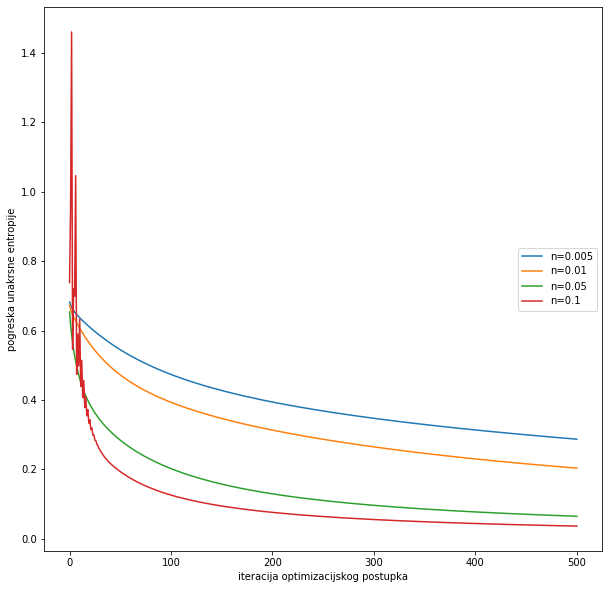

In [16]:
plt.figure(figsize=(10,10))
ni = [0.005, 0.01, 0.05, 0.1]
iter = 501
w, tracer, cross_error, error_01 = lr_train(seven_X, seven_y, max_iter=iter, trace=True, eta=0.05)
plt.plot(range(iter), cross_error, label="unakrsna entropija")
plt.plot(range(iter), error_01, label="gubitak 0-1")
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("pogreska")
plt.legend(loc="center right")  
plt.show()
plt.figure(figsize=(10,10))

for n in ni:
    w, tracer, cross_error, errors01 = lr_train(seven_X, seven_y, eta=n, max_iter=iter, trace=True)
    plt.plot(range(iter), cross_error, label="n="+str(n))
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("pogreska unakrsne entropije")
plt.legend(loc="center right")  
plt.show()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [17]:
from sklearn.linear_model import LogisticRegression

sklearn implementacija
[ 9.49288968 -2.25179102 -0.34919104]


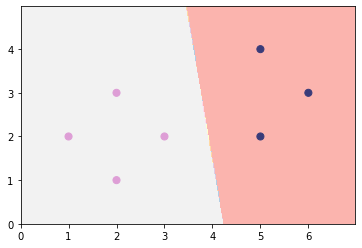

Moja implementacija
0 : [0.73940777]
500 : [0.59297834]
1000 : [0.75679508]
1500 : [0.82597383]
2000 : [0.85670021]
2500 : [0.87062971]
3000 : [0.87700058]
Reached max iteration:  3001
[10.59124483 -2.41351615 -0.51222191]


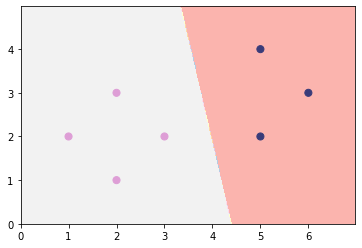

In [18]:
iter = 3001
print("sklearn implementacija")
LogReg = LogisticRegression(solver='sag', max_iter=iter, C=1/0.1)
LogReg.fit(seven_X, seven_y)
w = np.append(LogReg.intercept_, np.array(LogReg.coef_))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : LogReg.predict(x) >= 0.5)
print(w)
plt.show()
print("Moja implementacija")
w = lr_train(seven_X, seven_y, max_iter=iter, trace=False, alpha=0.1, eta=0.1)
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : lr_h(x, w) >= 0.5)
print(w)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

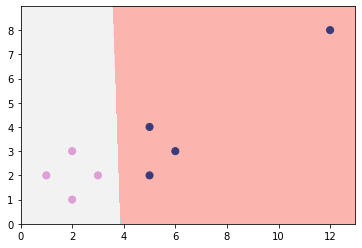

In [19]:
LogReg.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : LogReg.predict(x) >= 0.5)
# vise ne kaznjavamo primjere koji su jako ispravno klasificirani 

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


0 : [0.67284756]
500 : [0.28663874]
1000 : [0.29906017]
1500 : [0.34018119]
2000 : [0.38470466]
Reached max iteration:  2001


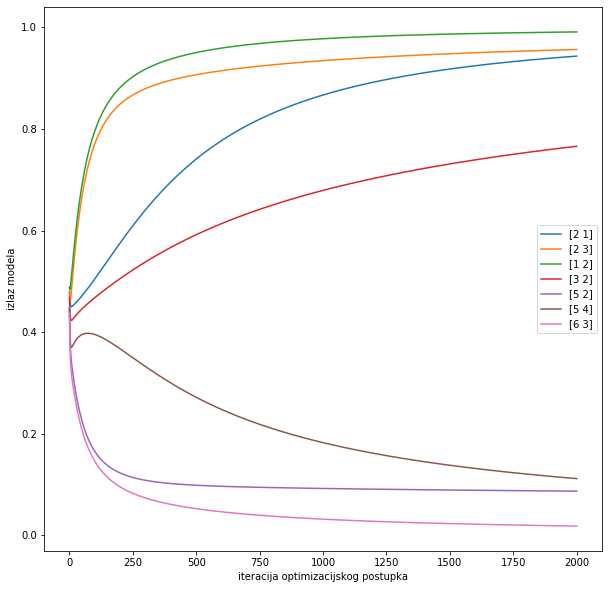

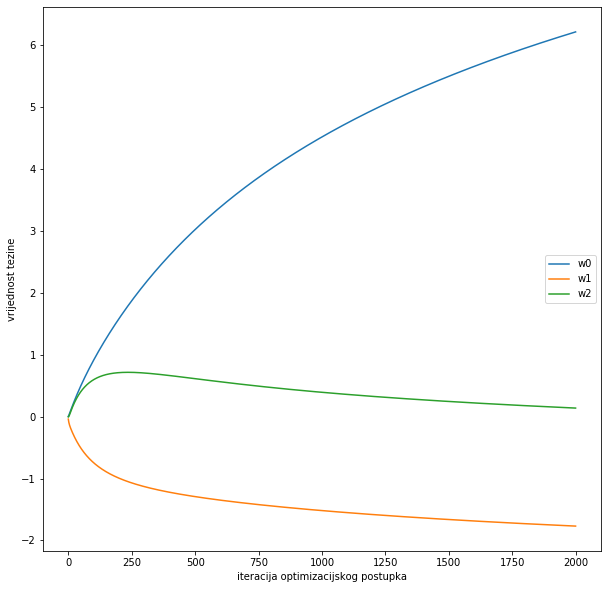

In [20]:
iter = 2001
plt.figure(figsize=(10,10))
w, tracer, cross_error, errors01 = lr_train(seven_X, seven_y, eta=0.01, max_iter=iter, trace=True, alpha=0.1)
for x in seven_X:
    y_pred = []
    for t in tracer:
        y_pred.append(lr_h(x, t))
    plt.plot(range(iter), y_pred, label=str(x))
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("izlaz modela")
plt.legend(loc="center right")  
plt.show()
w0, w1, w2 = [], [], []
for trace in tracer:
    w0.append(trace[0])
    w1.append(trace[1])
    w2.append(trace[2])
plt.figure(figsize=(10,10))
plt.plot(range(iter), w0, label="w0")
plt.plot(range(iter), w1, label="w1")
plt.plot(range(iter), w2, label="w2")
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("vrijednost tezine")
plt.legend(loc="center right")  


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

0 : [0.66507311]
500 : [0.44018917]
1000 : [0.44741124]
1500 : [0.46117705]
2000 : [0.47213776]
Reached max iteration:  2001


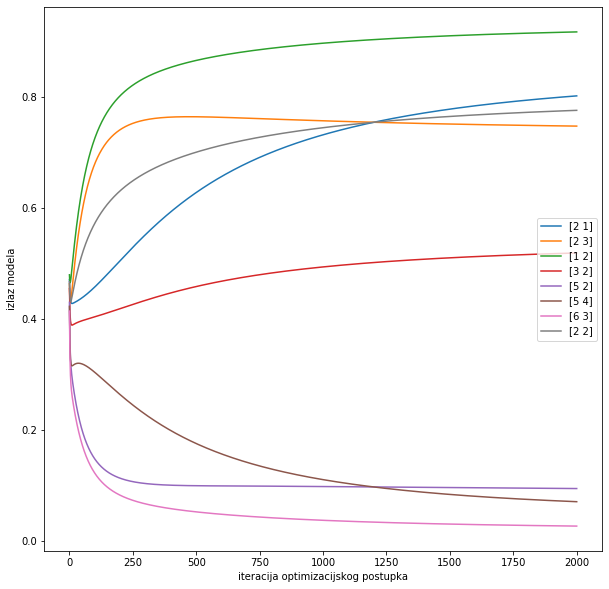

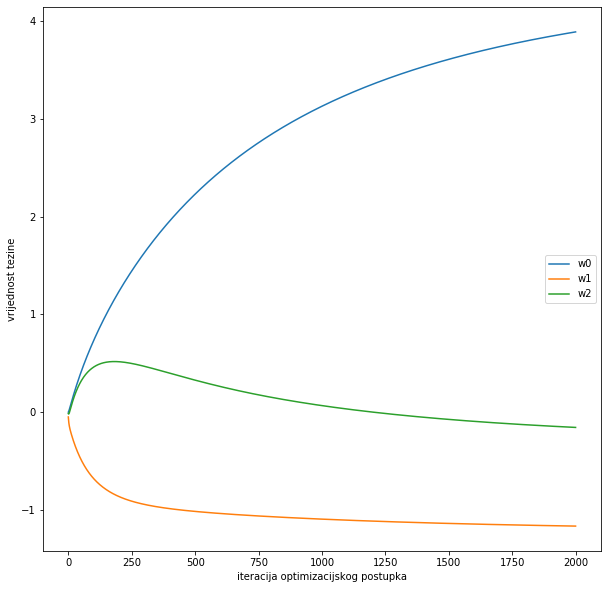

In [21]:
iter = 2001
plt.figure(figsize=(10,10))
w, tracer, cross_error, errors01 = lr_train(unsep_X, unsep_y, eta=0.01, max_iter=iter, trace=True, alpha=0.1)
for x in unsep_X:
    y_pred = []
    for t in tracer:
        y_pred.append(lr_h(x, t))
    plt.plot(range(iter), y_pred, label=str(x))
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("izlaz modela")
plt.legend(loc="center right")  
plt.show()
w0, w1, w2 = [], [], []
for trace in tracer:
    w0.append(trace[0])
    w1.append(trace[1])
    w2.append(trace[2])
plt.figure(figsize=(10,10))
plt.plot(range(iter), w0, label="w0")
plt.plot(range(iter), w1, label="w1")
plt.plot(range(iter), w2, label="w2")
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("vrijednost tezine")
plt.legend(loc="center right")  


### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [22]:
from numpy.linalg import norm

0 : [0.67283577]
500 : [0.20351284]
1000 : [0.13004573]
1500 : [0.09664006]
Reached max iteration:  1501
0 : [0.67295363]
500 : [0.89917066]
1000 : [1.42065409]
1500 : [1.75935726]
Reached max iteration:  1501
0 : [0.67401434]
500 : [2.61271391]
1000 : [2.93537197]
1500 : [2.96287148]
Reached max iteration:  1501
0 : [0.68462148]
500 : [2.53375013]
1000 : [2.5384485]
1500 : [2.53845457]
Reached max iteration:  1501


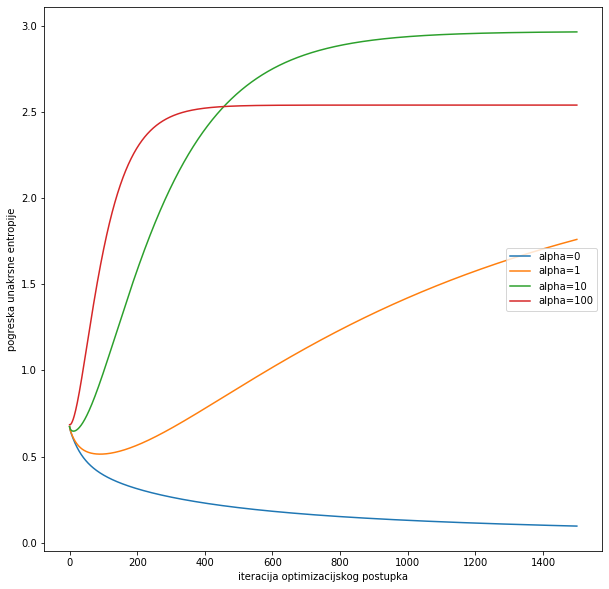

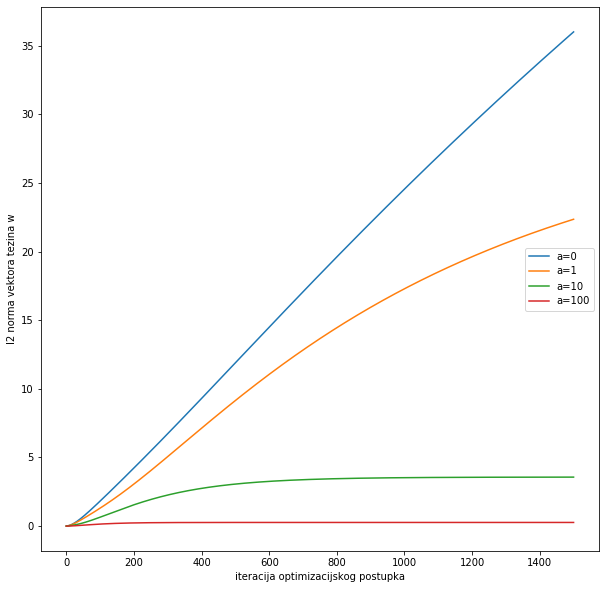

In [23]:
plt.figure(figsize=(10,10))
a = [0, 1, 10, 100]
iter, l2 = 1501, []

for ai in a:
    w, tracer, cross_error, errors01 = lr_train(seven_X, seven_y, eta=0.01, max_iter=iter, trace=True, alpha=ai)
    plt.plot(range(iter), cross_error, label="alpha="+str(ai))
    l2norm = []
    for trace in tracer:
        l2norm.append(matmul(np.transpose(trace), trace))
    l2.append(l2norm)
    
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("pogreska unakrsne entropije")
plt.legend(loc="center right")  
plt.show()

plt.figure(figsize=(10,10))
for i in range(len(a)):
    plt.plot(range(iter), l2[i], label="a="+str(a[i]))
plt.xlabel("iteracija optimizacijskog postupka")
plt.ylabel("l2 norma vektora tezina w")
plt.legend(loc="center right")  
plt.show()


### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

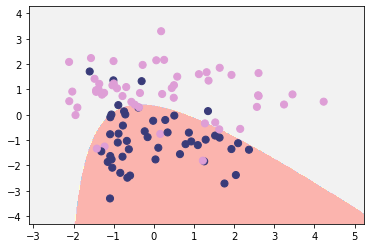

pogreska za stupanj polinoma 2:  0.87


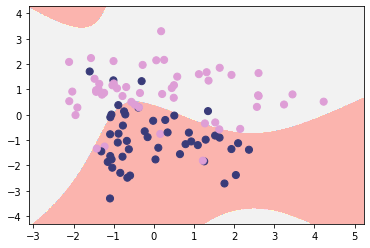

pogreska za stupanj polinoma 3:  0.86


In [26]:
from sklearn.preprocessing import PolynomialFeatures

X, y = make_classification(n_classes=2, n_clusters_per_class=2, n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0) 
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
phi2 = poly2.fit_transform(X)
phi3 = poly3.fit_transform(X)

LogReg.fit(phi2, y)
plot_2d_clf_problem(X, y, lambda x : LogReg.predict(poly2.transform(x)))
plt.show()
print("pogreska za stupanj polinoma 2: ", LogReg.score(phi2, y))
                    
LogReg.fit(phi3, y)
plot_2d_clf_problem(X, y, lambda x : LogReg.predict(poly3.transform(x)))
plt.show()
print("pogreska za stupanj polinoma 3: ", LogReg.score(phi3, y))
                    

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?